<a href="https://colab.research.google.com/github/aenoboa1/Draft_ML_EmotionAPP/blob/main/OpenFace_Shared.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Facial Feature Detection with OpenFace

This notebook uses an open source project [OpenFace](https://github.com/TadasBaltrusaitis/OpenFace) by Tadas Baltrusaitis to detect and track multi-person head motions and facial muscle movements on a given Youtube video. This notebook was inspired by [DL-CoLab-Notebooks](https://github.com/tugstugi/dl-colab-notebooks).

## Install OpenFace
The first code snippet installs all the necessary dependencies and may take a while (30~40 minutes). Go make yourself a cup of coffee and watch some Youtube videos to find the clips you'd like to extract facial features from while your environment sets up.


In [2]:
import os
from os.path import exists, join, basename, splitext

################# Need to revert back to CUDA 10.0 ##################
# Thanks to http://aconcaguasci.blogspot.com/2019/12/setting-up-cuda-100-for-mxnet-on-google.html
#Uninstall the current CUDA version
!apt-get --purge remove cuda nvidia* libnvidia-*
!dpkg -l | grep cuda- | awk '{print $2}' | xargs -n1 dpkg --purge
!apt-get remove cuda-*
!apt autoremove
!apt-get update

#Download CUDA 10.0
!wget  --no-clobber https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-repo-ubuntu1804_10.0.130-1_amd64.deb
#install CUDA kit dpkg
!dpkg -i cuda-repo-ubuntu1804_10.0.130-1_amd64.deb
!sudo apt-key adv --fetch-keys https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/7fa2af80.pub
!apt-get update
!apt-get install cuda-10-0
#Slove libcurand.so.10 error
!wget --no-clobber http://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64/nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb
#-nc, --no-clobber: skip downloads that would download to existing files.
!apt install ./nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb
!apt-get update
####################################################################

git_repo_url = 'https://github.com/TadasBaltrusaitis/OpenFace.git'
project_name = splitext(basename(git_repo_url))[0]
# clone openface
!git clone -q --depth 1 $git_repo_url

# install new CMake becaue of CUDA10
!wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
!tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local

# Get newest GCC
!sudo apt-get update
!sudo apt-get install build-essential 
!sudo apt-get install g++-8

# install python dependencies
!pip install -q youtube-dl

# Finally, actually install OpenFace
!cd OpenFace && bash ./download_models.sh && sudo bash ./install.sh

Streaming output truncated to the last 5000 lines.
  inflating: opencv-4.1.0/samples/cpp/tutorial_code/core/how_to_use_OpenCV_parallel_for_/how_to_use_OpenCV_parallel_for_.cpp  
   creating: opencv-4.1.0/samples/cpp/tutorial_code/core/mat_mask_operations/
  inflating: opencv-4.1.0/samples/cpp/tutorial_code/core/mat_mask_operations/mat_mask_operations.cpp  
   creating: opencv-4.1.0/samples/cpp/tutorial_code/core/mat_operations/
  inflating: opencv-4.1.0/samples/cpp/tutorial_code/core/mat_operations/mat_operations.cpp  
   creating: opencv-4.1.0/samples/cpp/tutorial_code/core/mat_the_basic_image_container/
  inflating: opencv-4.1.0/samples/cpp/tutorial_code/core/mat_the_basic_image_container/mat_the_basic_image_container.cpp  
   creating: opencv-4.1.0/samples/cpp/tutorial_code/features2D/
  inflating: opencv-4.1.0/samples/cpp/tutorial_code/features2D/AKAZE_match.cpp  
   creating: opencv-4.1.0/samples/cpp/tutorial_code/features2D/AKAZE_tracking/
  inflating: opencv-4.1.0/samples/cpp/tu

## Detect facial expressions on a test video

We are going to detect facial features on the following Youtube video:

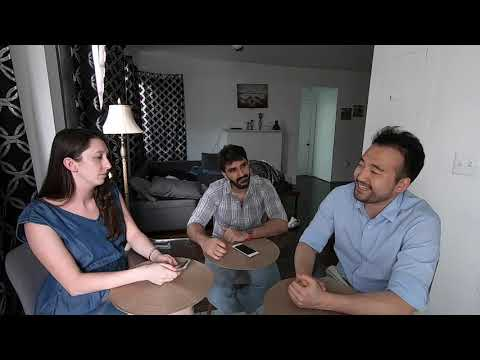

In [3]:
from IPython.display import YouTubeVideo

# Change the Youtube_ID with the link to your group's video.
YOUTUBE_ID = 'XtA6FQz8BHQ'

YouTubeVideo(YOUTUBE_ID)

Download the above youtube video, cut the first 10 seconds and do the face detection & feature extraction on that clip. This takes about a minute or two. Instead of `FaceLandmarkVidMulti` you may also use `FeatureExtraction` to extract features of a single face or `FaceLandmarkImg` to extract features on a face image. See full description of the arguments [here](https://github.com/TadasBaltrusaitis/OpenFace/wiki/Command-line-arguments). 

In [4]:
!rm -rf youtube.mp4
# download the youtube with the given ID
!youtube-dl -f 'bestvideo[ext=mp4]' --output "youtube.%(ext)s" https://www.youtube.com/watch?v=$YOUTUBE_ID
# cut the first 5 seconds
!ffmpeg -y -loglevel info -i youtube.mp4 -t 10 video.mp4
# clear any previous outputs.
!rm -rf processed
# detect poses on the these 10 seconds.
!./OpenFace/build/bin/FaceLandmarkVidMulti -f video.mp4 -out_dir processed
# convert the result into MP4
!ffmpeg -y -loglevel info -i processed/video.avi output.mp4

[youtube] XtA6FQz8BHQ: Downloading webpage
[youtube] XtA6FQz8BHQ: Downloading MPD manifest
[download] Destination: youtube.mp4
[download] 100% of 21.00MiB in 00:01
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-l

Finally, visualize the result:

In [5]:
def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

show_local_mp4_video('output.mp4', width=960, height=720)

# Extra: Here are some tips for loading and plotting the data. 

In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd, seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt 

# Load data
df = pd.read_csv('processed/video.csv')
# Remove empty spaces in column names.
df.columns = [col.replace(" ", "") for col in df.columns]
# Print few values of data.
print(f"Max number of frames {df.frame.max()}", f"\nTotal shape of dataframe {df.shape}")
df.head()

Max number of frames 300 
Total shape of dataframe (947, 714)


frame  face_id  timestamp  confidence  ...  AU25_c  AU26_c  AU28_c  AU45_c
0      1        0      0.000        0.98  ...     0.0     0.0     0.0     1.0
1      1        1      0.000        0.88  ...     1.0     0.0     1.0     1.0
2      1        2      0.000        0.03  ...     0.0     0.0     1.0     0.0
3      2        0      0.033        0.98  ...     0.0     0.0     0.0     1.0
4      2        1      0.033        0.88  ...     1.0     0.0     0.0     1.0

[5 rows x 714 columns]

In [7]:
# See how many unique faces there are
print("Number of unique faces: ", len(df.face_id.unique()), "\nList of face_id's: ", df.face_id.unique())

Number of unique faces:  4 
List of face_id's:  [0 1 2 3]


It looks like we see 4 faces instead of 3! Let's see how much confidence the algorithm had for detecting each face. 


In [8]:
df.groupby('face_id').mean()['confidence']

face_id
0    0.955367
1    0.888863
2    0.849410
3    0.154000
Name: confidence, dtype: float64

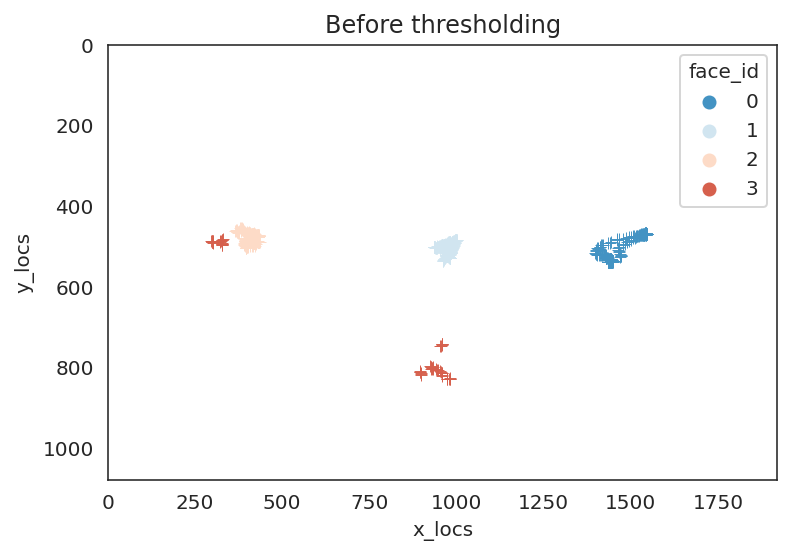

In [9]:
import re
x_regex_pat = re.compile(r'^x_[0-9]+$')
y_regex_pat = re.compile(r'^y_[0-9]+$')
x_locs = df.columns[df.columns.str.contains(x_regex_pat)]
y_locs = df.columns[df.columns.str.contains(y_regex_pat)]
no_unique_faces = len(df.face_id.unique())
palette = sns.color_palette("RdBu_r", no_unique_faces)

avg_face_df = pd.DataFrame({'x_locs':df[x_locs].mean(axis=1), 'y_locs':df[y_locs].mean(axis=1), 'face_id': df.face_id})
ax = sns.scatterplot(x='x_locs', y='y_locs', hue = 'face_id', data=avg_face_df, marker="+", palette=palette)
ax.set(xlim=[0, 1920], ylim=[1080,0], title="Before thresholding");

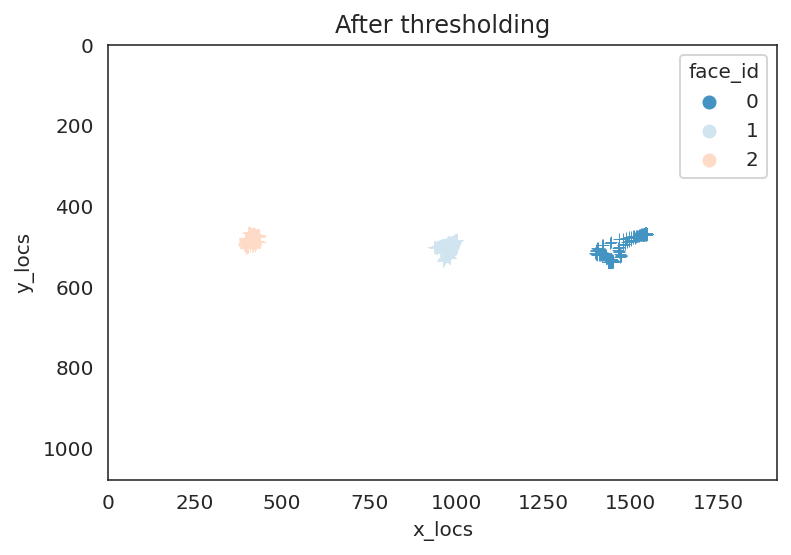

In [10]:
avg_face_df_conf = avg_face_df[df.confidence>=.80]
no_unique_faces = len(avg_face_df_conf.face_id.unique())
ax = sns.scatterplot(x='x_locs', y='y_locs', hue = 'face_id', data=avg_face_df_conf, marker="+", palette=palette[:no_unique_faces])
ax.set(xlim=[0, 1920], ylim=[1080,0], title="After thresholding");

Let's clean our data with a threshold of 80% confidence and plot the AU trajectories for all AUs.


List of AU columns: Index(['AU01_r', 'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU07_r', 'AU09_r',
       'AU10_r', 'AU12_r', 'AU14_r', 'AU15_r', 'AU17_r', 'AU20_r', 'AU23_r',
       'AU25_r', 'AU26_r', 'AU45_r'],
      dtype='object')


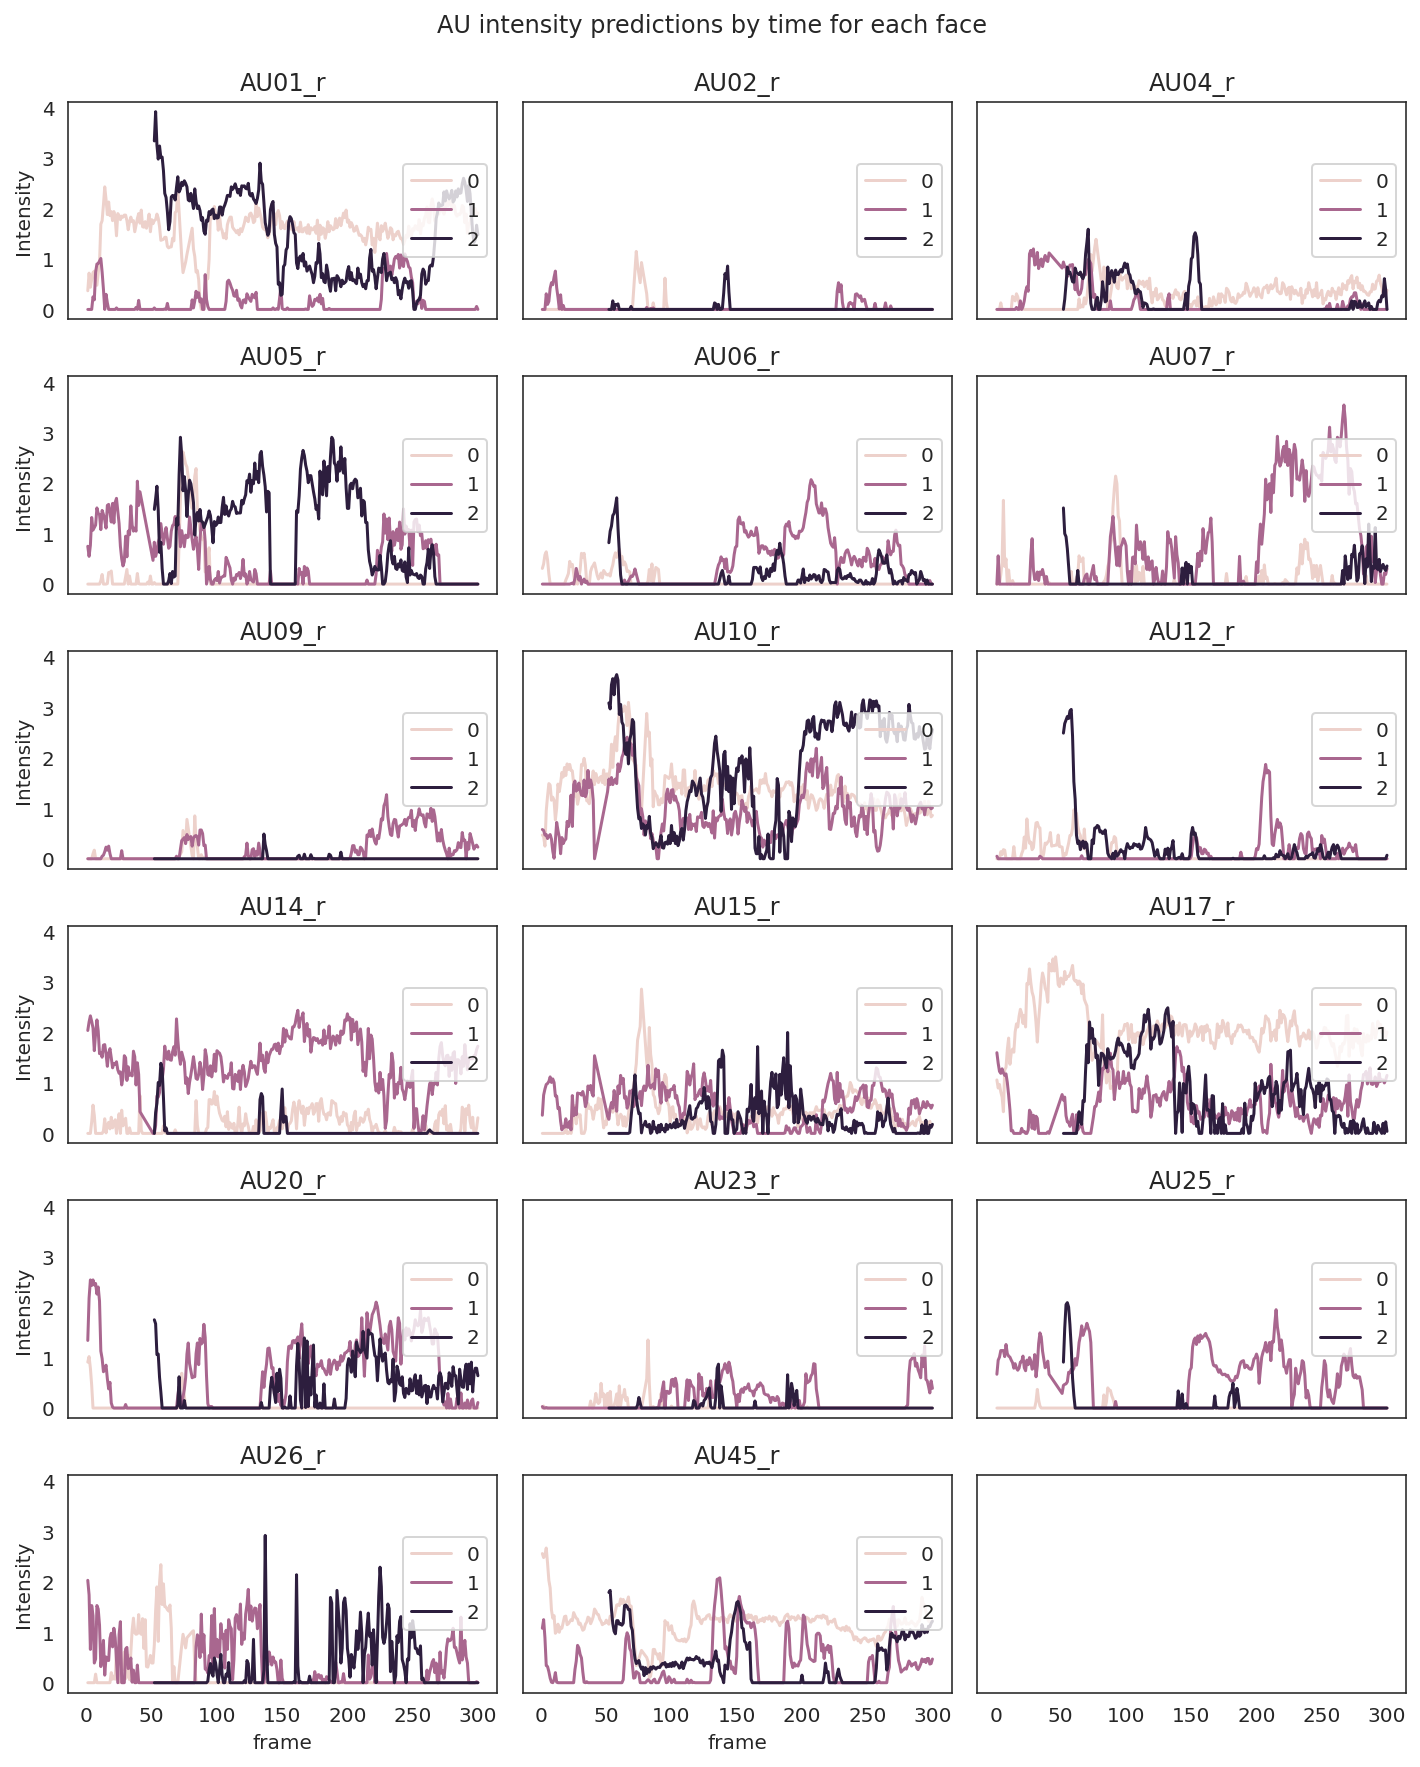

In [11]:
# Threshold data by 80%
df_clean = df[df.confidence>=.80]
# Plot all Action Unit time series. 
au_regex_pat = re.compile(r'^AU[0-9]+_r$')
au_columns = df.columns[df.columns.str.contains(au_regex_pat)]
print("List of AU columns:", au_columns)
f,axes = plt.subplots(6, 3, figsize=(10,12), sharex=True, sharey=True)
axes = axes.flatten()
for au_ix, au_col in enumerate(au_columns):
    sns.lineplot(x='frame', y=au_col, hue='face_id', data=df_clean, ax=axes[au_ix])
    axes[au_ix].set(title=au_col, ylabel='Intensity')
    axes[au_ix].legend(loc=5)
plt.suptitle("AU intensity predictions by time for each face", y=1.02)
plt.tight_layout()

We could also compare how synchronized each individuals are to one another during the interaction by using a simple Pearson correlation.

In [ ]:
# Let's compare how much AU12 (smiling) activity occurs at similar times across people.
df_clean.pivot(index='frame', columns='face_id', values='AU12_r').corr()

face_id         0         1         2
face_id                              
0        1.000000 -0.145006  0.451838
1       -0.145006  1.000000 -0.124261
2        0.451838 -0.124261  1.000000

# Lastly, here is just a few lines of code to get you started on working with gaze directions. 

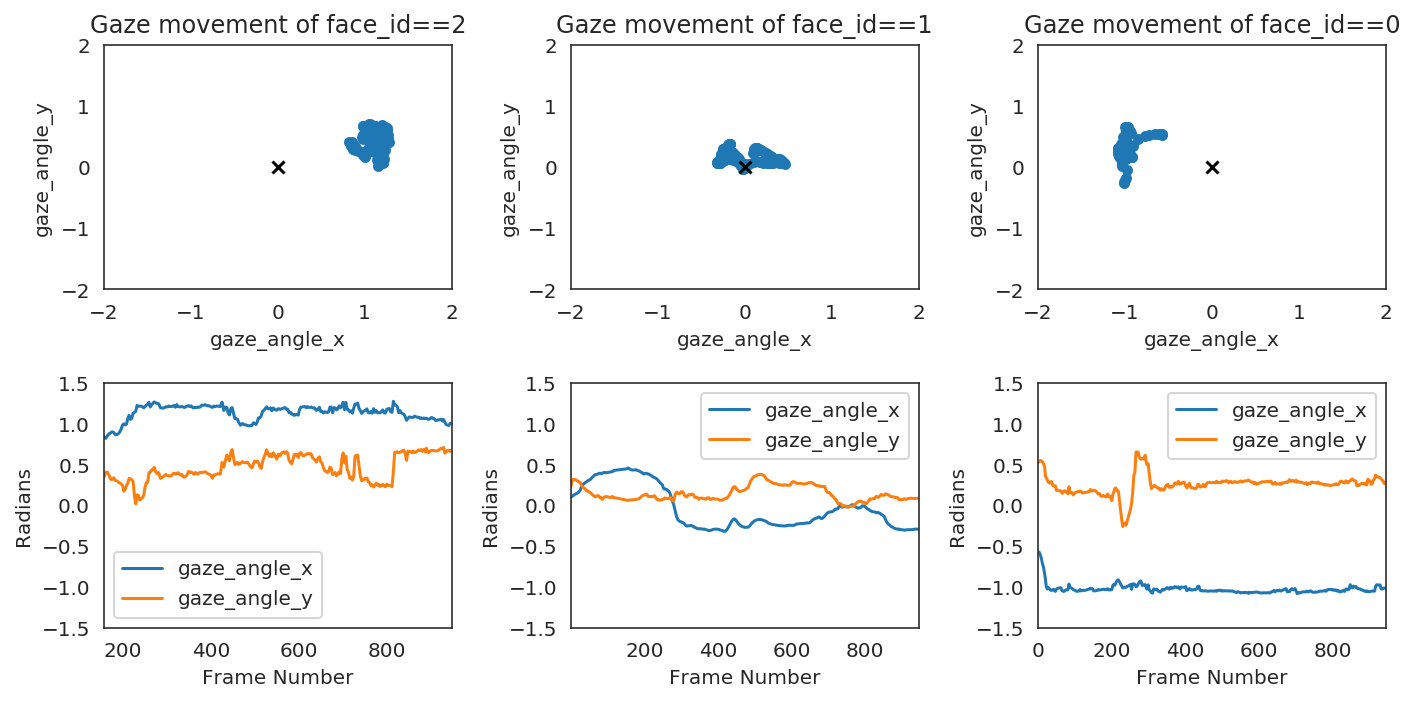

In [ ]:
f,axes = plt.subplots(2,len(df_clean.face_id.unique()), figsize=(10,5))
for faces_ix, face_id in enumerate(df_clean.face_id.unique()[::-1]):
  df_clean.query(f'face_id=={face_id}').plot.scatter(x='gaze_angle_x', y='gaze_angle_y', ax=axes[0][faces_ix])
  axes[0][faces_ix].scatter(0,0, marker='x', color = 'k') # draw origin.
  axes[0][faces_ix].set(xlim=[-2,2], ylim=[-2,2], title=f'Gaze movement of face_id=={face_id}')
  df_clean.query(f'face_id=={face_id}')[['gaze_angle_x', 'gaze_angle_y']].plot(ax=axes[1][faces_ix])
  axes[1][faces_ix].set(ylim=[-1.5,1.5], xlabel='Frame Number', ylabel="Radians")
plt.tight_layout()
plt.show()

In [13]:

from google.colab import drive
drive._mount('/content/drive')

Mounted at /content/drive


In [14]:

# NOTA: This may take a while         
!mkdir /content/DAiSEE ; unzip  -qq /content/drive/MyDrive/DATA/datasets/DAiSEE.zip -d /content/DAiSEE

In [16]:
!./OpenFace/build/bin/FaceLandmarkImg -fdir /content/DAiSEE/DAiSEE/DataSet/Data/Test/500044/5000441001 -out_dir /content/DAiSEE/DAiSEE/DataSet/Data/Test/500044/5000441001/landmarks

Attempting to read from directory: /content/DAiSEE/DAiSEE/DataSet/Data/Test/500044/5000441001
Could not find the HAAR face detector location
Loading the model
Reading the landmark detector/tracker from: ./OpenFace/build/bin/model/main_ceclm_general.txt
Reading the landmark detector module from: ./OpenFace/build/bin/model/cen_general.txt
Reading the PDM module from: ./OpenFace/build/bin/model/pdms/In-the-wild_aligned_PDM_68.txt....Done
Reading the Triangulations module from: ./OpenFace/build/bin/model/tris_68.txt....Done
Reading the intensity CEN patch experts from: ./OpenFace/build/bin/model/patch_experts/cen_patches_0.25_of.dat....Done
Reading the intensity CEN patch experts from: ./OpenFace/build/bin/model/patch_experts/cen_patches_0.35_of.dat....Done
Reading the intensity CEN patch experts from: ./OpenFace/build/bin/model/patch_experts/cen_patches_0.50_of.dat....Done
Reading the intensity CEN patch experts from: ./OpenFace/build/bin/model/patch_experts/cen_patches_1.00_of.dat....Don

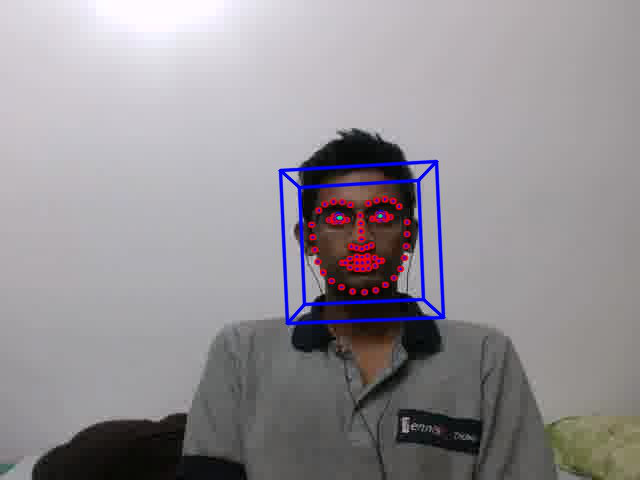

In [21]:
from keras.preprocessing.image import load_img
img = load_img("/content/DAiSEE/DAiSEE/DataSet/Data/Test/500044/5000441001/landmarks/5000441001116.jpg")
img